In [217]:
###Importing necessary libraries and dataset
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
df =  pd.read_excel('Economic_Analysis.xlsx')

In [218]:
df.head(10)

,date,Consumer Price Index,Mortgage_rate,Unemp_rate,NASDAQ,disposable_income,Personal_consumption_expenditure,personal_savings,Year,Month No.,Month,Decade,% MoM Inflation,%YoY Inflation,%MoM Wages,Mortgage Rate (%),Unemployment (%),MoM Return on the NASDAQ
0,1980-11-01,85.6,14.2050,7.5,200.685556,4976.5,1826.8,11.6,1980,11,Nov,80s,0.000000,0.000000,0.000000,0.142050,0.075,0.000000
1,1980-12-01,86.4,14.7900,7.2,198.398636,4999.8,1851.7,11.4,1980,12,Dec,NaN,0.009346,0.009346,0.004682,0.147900,0.072,-0.011396
2,1981-01-01,87.2,14.9040,7.5,198.817619,4980.4,1870.0,10.9,1981,1,Jan,NaN,0.009259,0.018692,-0.003880,0.149040,0.075,0.002112
3,1981-02-01,88.0,15.1325,7.4,194.852105,4965.0,1884.2,10.8,1981,2,Feb,NaN,0.009174,0.028037,-0.003092,0.151325,0.074,-0.019945
4,1981-03-01,88.6,15.4000,7.4,203.593182,4979.0,1902.9,10.8,1981,3,Mar,NaN,0.006818,0.035047,0.002820,0.154000,0.074,0.044860
5,1981-04-01,89.1,15.5800,7.2,215.120000,4965.1,1904.4,10.9,1981,4,Apr,NaN,0.005643,0.040888,-0.002792,0.155800,0.072,0.056617
6,1981-05-01,89.7,16.4020,7.5,216.543500,4974.8,1913.8,11.0,1981,5,May,NaN,0.006734,0.047897,0.001954,0.164020,0.075,0.006617
7,1981-06-01,90.5,16.6950,7.5,220.040455,5001.9,1934.5,10.8,1981,6,Jun,NaN,0.008919,0.057243,0.005447,0.166950,0.075,0.016149
8,1981-07-01,91.5,16.8320,7.2,209.720909,5080.8,1942.1,12.3,1981,7,Jul,NaN,0.011050,0.068925,0.015774,0.168320,0.072,-0.046898
9,1981-08-01,92.2,17.2850,7.4,206.626191,5095.9,1966.6,12.0,1981,8,Aug,NaN,0.007650,0.077103,0.002972,0.172850,0.074,-0.014756


In [219]:
df[['% MoM Inflation']] = (100 * df[['% MoM Inflation']]).round(2).astype(float)
df[['%YoY Inflation']] = (100 * df[['%YoY Inflation']]).round(2).astype(float)
df[['%MoM Wages']] = (100 * df[['%MoM Wages']]).round(2).astype(float)
df[['Mortgage Rate (%)']] = (100 * df[['Mortgage Rate (%)']]).round(2).astype(float)
df[['Unemployment (%)']] = (100 * df[['Unemployment (%)']]).round(2).astype(float)
df[['MoM Return on the NASDAQ']] = (100 * df[['MoM Return on the NASDAQ']]).round(2).astype(float)
df

,date,Consumer Price Index,Mortgage_rate,Unemp_rate,NASDAQ,disposable_income,Personal_consumption_expenditure,personal_savings,Year,Month No.,Month,Decade,% MoM Inflation,%YoY Inflation,%MoM Wages,Mortgage Rate (%),Unemployment (%),MoM Return on the NASDAQ
0,1980-11-01,85.600,14.2050,7.5,200.685556,4976.5,1826.8,11.6,1980,11,Nov,80s,0.00,0.00,0.00,14.21,7.5,0.00
1,1980-12-01,86.400,14.7900,7.2,198.398636,4999.8,1851.7,11.4,1980,12,Dec,NaN,0.93,0.93,0.47,14.79,7.2,-1.14
2,1981-01-01,87.200,14.9040,7.5,198.817619,4980.4,1870.0,10.9,1981,1,Jan,NaN,0.93,1.87,-0.39,14.90,7.5,0.21
3,1981-02-01,88.000,15.1325,7.4,194.852105,4965.0,1884.2,10.8,1981,2,Feb,NaN,0.92,2.80,-0.31,15.13,7.4,-1.99
4,1981-03-01,88.600,15.4000,7.4,203.593182,4979.0,1902.9,10.8,1981,3,Mar,NaN,0.68,3.50,0.28,15.40,7.4,4.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,2022-01-01,281.933,3.4450,4.0,14531.377500,15163.5,16543.3,5.8,2022,1,Jan,NaN,0.65,7.53,-1.81,3.44,4.0,-6.09
495,2022-02-01,284.182,3.7625,3.8,13898.727890,15173.6,16635.8,5.8,2022,2,Feb,NaN,0.80,7.91,0.07,3.76,3.8,-4.35
496,2022-03-01,287.708,4.1720,3.6,13623.263040,15119.6,16831.2,5.3,2022,3,Mar,NaN,1.24,8.56,-0.36,4.17,3.6,-1.98
497,2022-04-01,288.663,4.9825,3.6,13394.163000,15154.4,16911.2,5.2,2022,4,Apr,NaN,0.33,8.22,0.23,4.98,3.6,-1.68


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   date                              499 non-null    datetime64[ns]
 1   Consumer Price Index              499 non-null    float64       
 2   Mortgage_rate                     499 non-null    float64       
 3   Unemp_rate                        499 non-null    float64       
 4   NASDAQ                            499 non-null    float64       
 5   disposable_income                 499 non-null    float64       
 6   Personal_consumption_expenditure  499 non-null    float64       
 7   personal_savings                  499 non-null    float64       
 8   Year                              499 non-null    int64         
 9   Month No.                         499 non-null    int64         
 10  Month                             499 non-null    

In [222]:
#filling the decade columns
df['Decade'] =[int(np.floor(year/10)*10) for year in np.array(df['Year'])]

In [225]:
df.loc[:50]

,date,Consumer Price Index,Mortgage_rate,Unemp_rate,NASDAQ,disposable_income,Personal_consumption_expenditure,personal_savings,Year,Month No.,Month,Decade,% MoM Inflation,%YoY Inflation,%MoM Wages,Mortgage Rate (%),Unemployment (%),MoM Return on the NASDAQ
0,1980-11-01,85.6,14.2050,7.5,200.685556,4976.5,1826.8,11.6,1980,11,Nov,1980,0.00,0.00,0.00,14.21,7.5,0.00
1,1980-12-01,86.4,14.7900,7.2,198.398636,4999.8,1851.7,11.4,1980,12,Dec,1980,0.93,0.93,0.47,14.79,7.2,-1.14
2,1981-01-01,87.2,14.9040,7.5,198.817619,4980.4,1870.0,10.9,1981,1,Jan,1980,0.93,1.87,-0.39,14.90,7.5,0.21
3,1981-02-01,88.0,15.1325,7.4,194.852105,4965.0,1884.2,10.8,1981,2,Feb,1980,0.92,2.80,-0.31,15.13,7.4,-1.99
4,1981-03-01,88.6,15.4000,7.4,203.593182,4979.0,1902.9,10.8,1981,3,Mar,1980,0.68,3.50,0.28,15.40,7.4,4.49
5,1981-04-01,89.1,15.5800,7.2,215.120000,4965.1,1904.4,10.9,1981,4,Apr,1980,0.56,4.09,-0.28,15.58,7.2,5.66
6,1981-05-01,89.7,16.4020,7.5,216.543500,4974.8,1913.8,11.0,1981,5,May,1980,0.67,4.79,0.20,16.40,7.5,0.66
7,1981-06-01,90.5,16.6950,7.5,220.040455,5001.9,1934.5,10.8,1981,6,Jun,1980,0.89,5.72,0.54,16.70,7.5,1.61
8,1981-07-01,91.5,16.8320,7.2,209.720909,5080.8,1942.1,12.3,1981,7,Jul,1980,1.10,6.89,1.58,16.83,7.2,-4.69
9,1981-08-01,92.2,17.2850,7.4,206.626191,5095.9,1966.6,12.0,1981,8,Aug,1980,0.77,7.71,0.30,17.28,7.4,-1.48


In [226]:
df[['% MoM Inflation','MoM Return on the NASDAQ']].mean()

% MoM Inflation             0.246112
MoM Return on the NASDAQ    0.954930
dtype: float64

We see that the average monthly inflation throughout the dataset has been less than the average monthly return on the NASDAQ

In [227]:
df[['% MoM Inflation','%MoM Wages']].mean()

% MoM Inflation    0.246112
%MoM Wages         0.237876
dtype: float64

We also see the average wage is slightly less than the inflation rate

In [228]:
df.groupby('Decade')[['Unemployment (%)']].mean()

,Unemployment (%)
Decade,
1980,7.284545
1990,5.762500
2000,5.541667
2010,6.220833
2020,6.206897


In [229]:
df.groupby('Decade')[['%YoY Inflation','% MoM Inflation']].mean()

,%YoY Inflation,% MoM Inflation
Decade,,
1980,4.133455,0.354636
1990,3.007500,0.242000
2000,2.573250,0.211583
2010,1.771500,0.143583
2020,3.859310,0.418621


In [230]:
ave = df.groupby('Decade')[['%YoY Inflation','% MoM Inflation', 'Mortgage Rate (%)','Mortgage_rate','Unemp_rate']].mean()

In [231]:
ave['decade'] = ave.index
ave.head()

,%YoY Inflation,% MoM Inflation,Mortgage Rate (%),Mortgage_rate,Unemp_rate,decade
Decade,,,,,,
1980,4.133455,0.354636,12.620818,12.620755,7.284545,1980
1990,3.007500,0.242000,8.118583,8.118475,5.762500,1990
2000,2.573250,0.211583,6.292250,6.292108,5.541667,2000
2010,1.771500,0.143583,4.091583,4.091758,6.220833,2010
2020,3.859310,0.418621,3.255517,3.256017,6.206897,2020


In [232]:
ave.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1980 to 2020
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   %YoY Inflation     5 non-null      float64
 1   % MoM Inflation    5 non-null      float64
 2   Mortgage Rate (%)  5 non-null      float64
 3   Mortgage_rate      5 non-null      float64
 4   Unemp_rate         5 non-null      float64
 5   decade             5 non-null      int64  
dtypes: float64(5), int64(1)
memory usage: 280.0 bytes


<AxesSubplot:xlabel='Unemp_rate', ylabel='Mortgage_rate'>

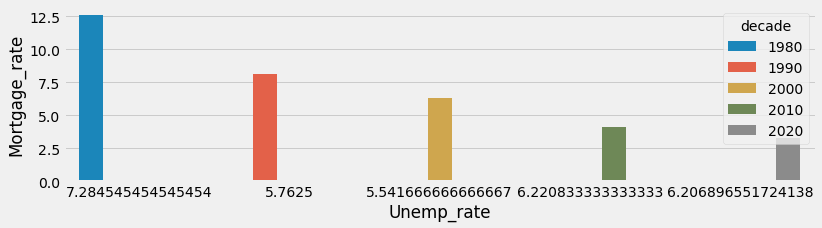

In [234]:
plt.figure(figsize = (12,3))
sns.barplot(y = 'Mortgage_rate',x='Unemp_rate', hue = 'decade',
            order = ave.sort_values('decade')['Unemp_rate'],data = ave)

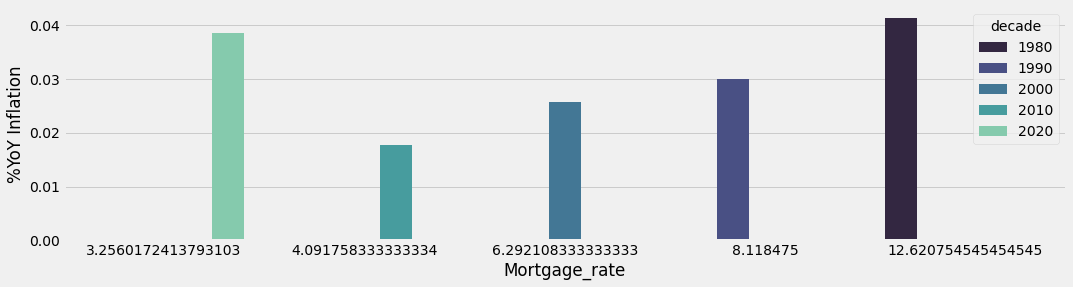

In [128]:
plt.figure(figsize=(16,4))
plot = sns.barplot(data=ave, y= '%YoY Inflation', x = 'Mortgage_rate', hue = 'decade',palette = 'mako')

<AxesSubplot:>

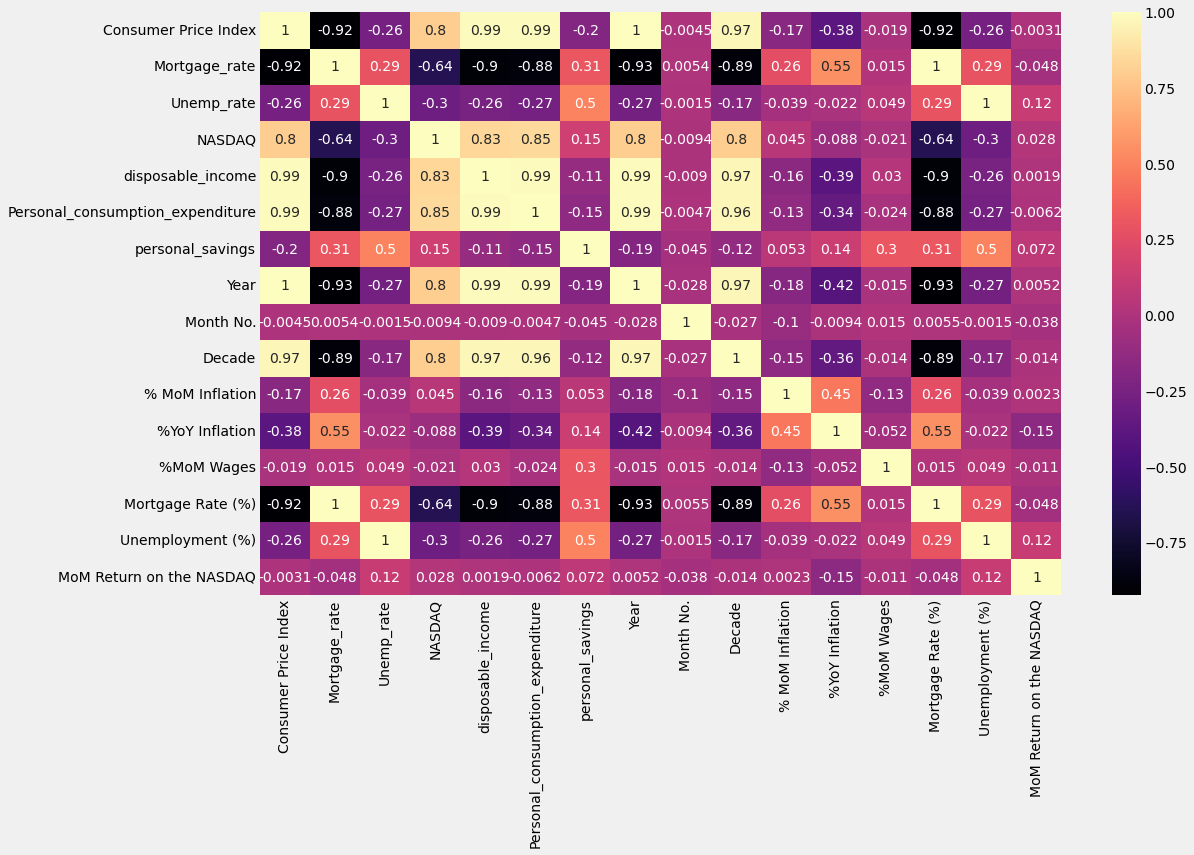

In [235]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot = True, cmap = 'magma')

We see that the MoM inflation rate has a weak correlation to the mortage rate while the YoY inflation rate has a medium correlation to the mortgage rate

In [236]:
df.groupby('Year')[['MoM Return on the NASDAQ','% MoM Inflation','personal_savings','Unemployment (%)'
                   ,'disposable_income','Mortgage_rate']].mean()

,MoM Return on the NASDAQ,% MoM Inflation,personal_savings,Unemployment (%),disposable_income,Mortgage_rate
Year,,,,,,
1980,-0.570000,0.465000,11.500000,7.350000,4988.150000,14.497500
1981,0.041667,0.714167,11.716667,7.616667,5034.250000,16.634625
1982,1.587500,0.315833,12.041667,9.708333,5145.391667,16.090208
1983,1.596667,0.309167,10.050000,9.600000,5322.808333,13.226875
1984,-1.099167,0.330833,11.325000,7.508333,5688.058333,13.869375
1985,2.443333,0.312500,9.166667,7.191667,5859.275000,12.423250
1986,0.915833,0.098333,8.825000,7.000000,6081.841667,10.177833
1987,-0.717500,0.354167,7.908333,6.175000,6216.175000,10.194417
1988,1.545833,0.360000,8.475000,5.491667,6508.583333,10.334250


In [237]:
graph = df.groupby('Decade')[['MoM Return on the NASDAQ','% MoM Inflation','personal_savings','%YoY Inflation','Personal_consumption_expenditure'
                   ,'disposable_income','Mortgage_rate','Unemp_rate']].mean()
graph

,MoM Return on the NASDAQ,% MoM Inflation,personal_savings,%YoY Inflation,Personal_consumption_expenditure,disposable_income,Mortgage_rate,Unemp_rate
Decade,,,,,,,,
1980,0.844364,0.354636,9.796364,4.133455,2691.035455,5824.049091,12.620755,7.284545
1990,1.908250,0.242000,7.313333,3.007500,4902.795000,7744.468333,8.118475,5.762500
2000,-0.212000,0.211583,4.588333,2.573250,8489.684167,10704.995833,6.292108,5.541667
2010,1.205500,0.143583,7.184167,1.771500,12175.579167,13169.231667,4.091758,6.220833
2020,1.221379,0.418621,12.686207,3.859310,15218.817241,15733.362069,3.256017,6.206897


In [238]:
graph['decade'] = graph.index

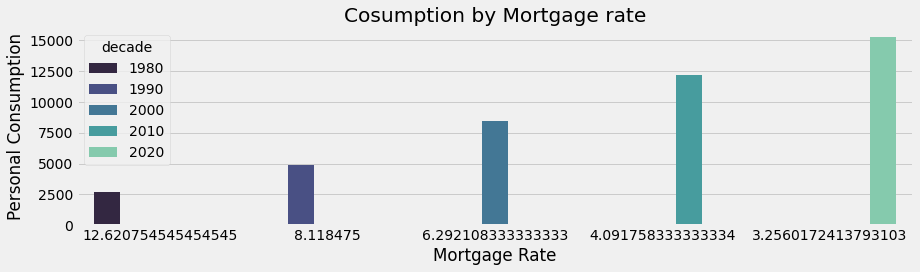

In [239]:
plt.figure(figsize=(13,4))
sns.barplot(data=graph, y= 'Personal_consumption_expenditure', x = 'Mortgage_rate', hue = 'decade',
            order = graph.sort_values('decade')['Mortgage_rate'],palette = 'mako')
plt.xlabel('Mortgage Rate')
plt.ylabel('Personal Consumption')
plt.title("Cosumption by Mortgage rate")
plt.tight_layout()

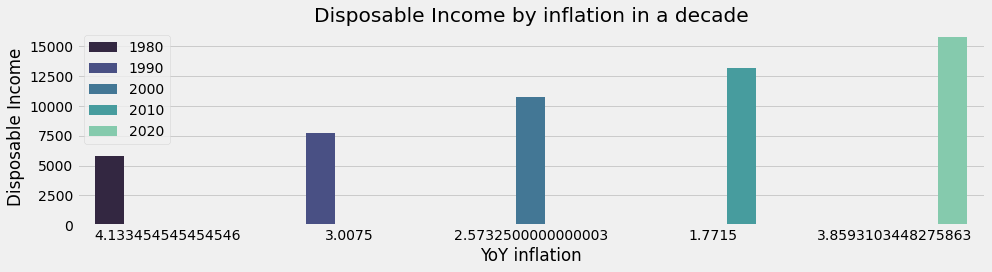

In [240]:
plt.figure(figsize=(14,4))
sns.barplot(data=graph, x= '%YoY Inflation', y = 'disposable_income', hue = 'decade',palette = 'mako', 
            order = graph.sort_values('decade')['%YoY Inflation'])
plt.legend(loc = 'upper left')
plt.xlabel('YoY inflation')
plt.ylabel('Disposable Income')
plt.title("Disposable Income by inflation in a decade")
plt.tight_layout()

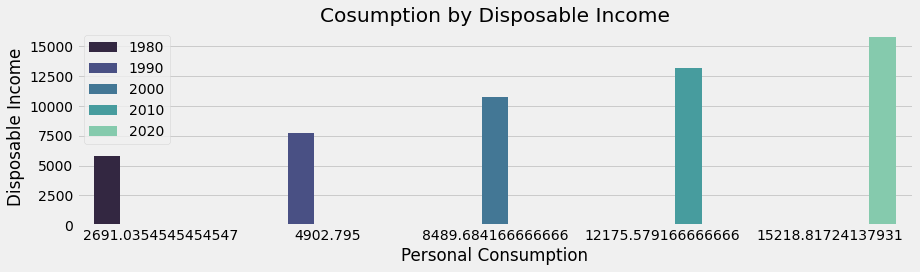

In [241]:
plt.figure(figsize=(13,4))
sns.barplot(data=graph, x= 'Personal_consumption_expenditure', y = 'disposable_income', hue = 'decade',
            order = graph.sort_values('decade')['Personal_consumption_expenditure'],palette = 'mako')
plt.legend(loc = 'upper left')
plt.ylabel('Disposable Income')
plt.xlabel('Personal Consumption')
plt.title("Cosumption by Disposable Income")
plt.tight_layout()

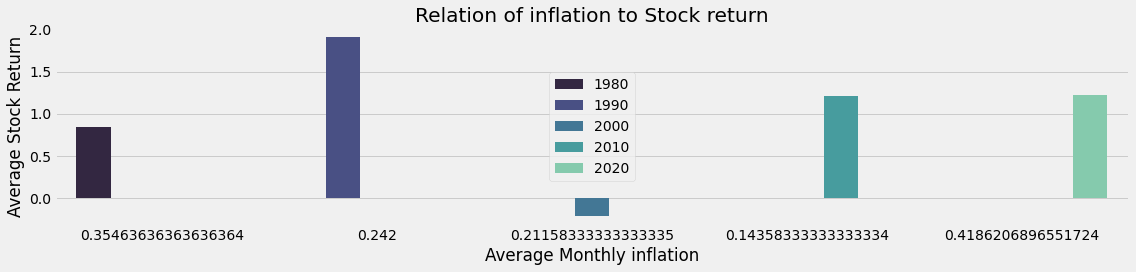

In [242]:
plt.figure(figsize=(16,4))
sns.barplot(data=graph, y = 'MoM Return on the NASDAQ', x = '% MoM Inflation', hue = 'decade',
            order = graph.sort_values('decade')['% MoM Inflation'],palette = 'mako')
plt.legend(loc = 'center')
plt.ylabel('Average Stock Return')
plt.xlabel('Average Monthly inflation')
plt.title("Relation of inflation to Stock return")
plt.tight_layout()